In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../ptu_derep/derep_plasmids_lengths.tsv", sep="\t")

df.head()

,Plasmid,length
0,2088090014|GPIPI_16944593,5584
1,2088090014|GPIPI_16884012,8233
2,2088090014|GPIPI_17035422,5654
3,2088090014|GPIPI_17320127,5097
4,2088090014|GPIPI_16557027,6619


In [3]:
with open("../nikos_questions/isolate_plasmids_50kb_up.txt") as f:
    isolate_plasmids_50kb_up_meta_hit = f.read().splitlines()

with open("../nikos_questions/isolate_plasmids_cov_1.0.txt") as f:
    isolate_plasmids_cov_1_0 = f.read().splitlines()

In [4]:
with open("../ptu_derep/meta_complete.txt") as f:
    complete = f.read().splitlines()

In [5]:
df["complete"] = df["Plasmid"].apply(
    lambda x: "PLSDB" in x or "Refsoil" in x or x in complete
)
df["Origin"] = df["Plasmid"].apply(
    lambda x: (
        "Isolate"
        if any(prefix in x for prefix in ["IMGPR", "PLSDB", "Refsoil"])
        else "Meta"
    )
)

df["Origin_2"] = df["Plasmid"].apply(
    lambda x: "Isolate_with_meta_hit"
    if x in isolate_plasmids_50kb_up_meta_hit
    else "Isolate"
    if any(prefix in x for prefix in ["IMGPR", "PLSDB", "Refsoil"])
    else "Meta"
)

df["Origin_3"] = df["Plasmid"].apply(
    lambda x: "Isolate_with_meta_hit"
    if x in isolate_plasmids_cov_1_0
    else "Isolate"
    if any(prefix in x for prefix in ["IMGPR", "PLSDB", "Refsoil"])
    else "Meta"
)

df["Length_kb"] = df["length"] / 1000
df.head()

,Plasmid,length,complete,Origin,Origin_2,Origin_3,Length_kb
0,2088090014|GPIPI_16944593,5584,False,Meta,Meta,Meta,5.584
1,2088090014|GPIPI_16884012,8233,False,Meta,Meta,Meta,8.233
2,2088090014|GPIPI_17035422,5654,False,Meta,Meta,Meta,5.654
3,2088090014|GPIPI_17320127,5097,False,Meta,Meta,Meta,5.097
4,2088090014|GPIPI_16557027,6619,False,Meta,Meta,Meta,6.619


In [6]:
df[df["Plasmid"].str.contains("IMGPR")]

,Plasmid,length,complete,Origin,Origin_2,Origin_3,Length_kb
91706,IMGPR_plasmid_2860691947_000001|2860691947|286...,110701,False,Isolate,Isolate,Isolate,110.701
91707,IMGPR_plasmid_2860691947_000002|2860691947|286...,561689,False,Isolate,Isolate,Isolate,561.689
91708,IMGPR_plasmid_2754412351_000005|2754412351|275...,267249,False,Isolate,Isolate,Isolate,267.249
91709,IMGPR_plasmid_2537562007_000009|2537562007|253...,274779,False,Isolate,Isolate,Isolate,274.779
91710,IMGPR_plasmid_2537562007_000001|2537562007|253...,26115,False,Isolate,Isolate,Isolate,26.115
...,...,...,...,...,...,...,...
98276,IMGPR_plasmid_2667527448_000009|2667527448|266...,22833,False,Isolate,Isolate,Isolate,22.833
98277,IMGPR_plasmid_2862854852_000002|2862854852|286...,19753,False,Isolate,Isolate,Isolate,19.753
98278,IMGPR_plasmid_2862854852_000003|2862854852|286...,19750,False,Isolate,Isolate,Isolate,19.750
98279,IMGPR_plasmid_2862854852_000006|2862854852|286...,5770,False,Isolate,Isolate,Isolate,5.770


In [7]:
round(df[(df["Origin"] == "Meta") & (df["complete"] == True)]["Length_kb"].max(), 2)

413.22

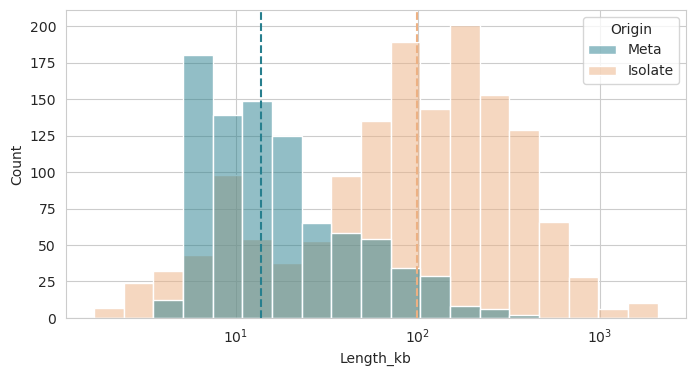

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(
    data=df[df["complete"]],
    x="Length_kb",
    hue="Origin",
    ax=ax,
    log_scale=True,
    fill=True,
    palette=["#277F8E", "#EDB183"],
)
plt.axvline(
    x=round(
        df[(df["Origin"] == "Meta") & (df["complete"] == True)]["Length_kb"].median(), 2
    ),
    color="#277F8E",
    linestyle="--",
)
plt.axvline(
    x=round(
        df[(df["Origin"] == "Isolate") & (df["complete"] == True)][
            "Length_kb"
        ].median(),
        2,
    ),
    color="#EDB183",
    linestyle="--",
)

fig.savefig("../figures/plasmid_length_distribution.pdf", bbox_inches="tight")

In [9]:
# fig, ax = plt.subplots(figsize=(8, 4))
# sns.histplot(
#     data=df[df["complete"]],
#     x="Length_kb",
#     hue="Origin_2",
#     ax=ax,
#     log_scale=True,
#     fill=True,
#     palette=["#277F8E", "#EDB183", "red"],
# )
# plt.axvline(
#     x=round(
#         df[(df["Origin_2"] == "Meta") & (df["complete"] == True)]["Length_kb"].median(),
#         2,
#     ),
#     color="#277F8E",
#     linestyle="--",
# )

# plt.axvline(
#     x=round(
#         df[(df["Origin_3"] == "Isolate_with_meta_hit") & (df["complete"] == True)][
#             "Length_kb"
#         ].median(),
#         2,
#     ),
#     color="#8A9889",
#     linestyle="--",
# )

# plt.axvline(
#     x=round(
#         df[(df["Origin_3"] == "Isolate") & (df["complete"] == True)][
#             "Length_kb"
#         ].median(),
#         2,
#     ),
#     color="red",
#     linestyle="--",
# )

# fig.savefig(
#     "../figures/plasmid_length_distribution_complete_nikos.pdf", bbox_inches="tight"
# )

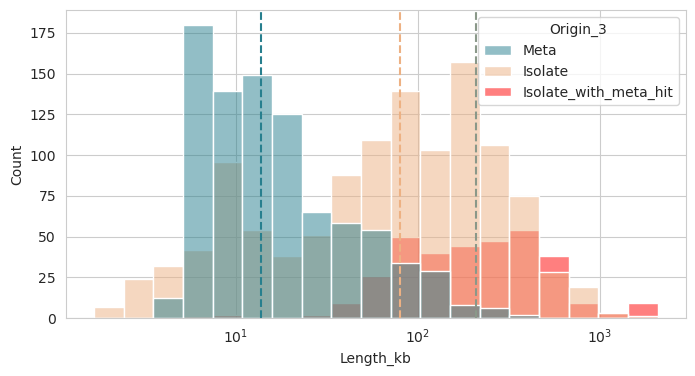

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(
    data=df[df["complete"]],
    x="Length_kb",
    hue="Origin_3",
    ax=ax,
    log_scale=True,
    fill=True,
    palette=["#277F8E", "#EDB183", "red"],
)
plt.axvline(
    x=round(
        df[(df["Origin_3"] == "Meta") & (df["complete"] == True)]["Length_kb"].median(),
        2,
    ),
    color="#277F8E",
    linestyle="--",
)

plt.axvline(
    x=round(
        df[(df["Origin_3"] == "Isolate_with_meta_hit") & (df["complete"] == True)][
            "Length_kb"
        ].median(),
        2,
    ),
    color="#8A9889",
    linestyle="--",
)

plt.axvline(
    x=round(
        df[(df["Origin_3"] == "Isolate") & (df["complete"] == True)][
            "Length_kb"
        ].median(),
        2,
    ),
    color="#EDB183",
    linestyle="--",
)

fig.savefig(
    "../figures/plasmid_length_distribution_complete_nikos.pdf", bbox_inches="tight"
)

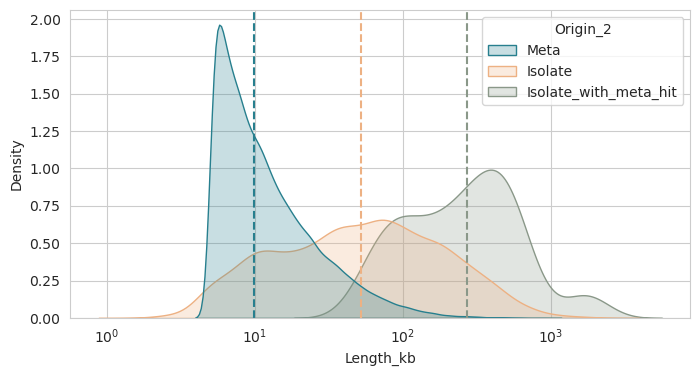

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.kdeplot(
    data=df,
    x="Length_kb",
    hue="Origin_2",
    ax=ax,
    log_scale=True,
    fill=True,
    common_norm=False,
    palette=["#277F8E", "#EDB183", "#8A9889"],
)
plt.axvline(
    x=round(df[(df["Origin_2"] == "Meta")]["Length_kb"].median(), 2),
    color="#277F8E",
    linestyle="--",
)

plt.axvline(
    x=round(
        df[(df["Origin_2"] == "Isolate_with_meta_hit")]["Length_kb"].median(),
        2,
    ),
    color="#8A9889",
    linestyle="--",
)

plt.axvline(
    x=round(
        df[(df["Origin_2"] == "Isolate")]["Length_kb"].median(),
        2,
    ),
    color="#EDB183",
    linestyle="--",
)

# fig.savefig("../figures/plasmid_length_distribution_all_nikos.pdf", bbox_inches="tight")

In [27]:
df[(df["complete"]) & (df["Origin"] == "Meta")]["Length_kb"].median()

13.786

In [28]:
df[(df["complete"]) & (df["Origin"] == "Isolate")]["Length_kb"].median()

99.3255

In [33]:
df[(df["complete"]) & (df["Origin"] == "Isolate")]["Length_kb"].median() / df[
    (df["complete"]) & (df["Origin"] == "Meta")
]["Length_kb"].median()

7.204809226751777

<Axes: ylabel='Length_kb'>

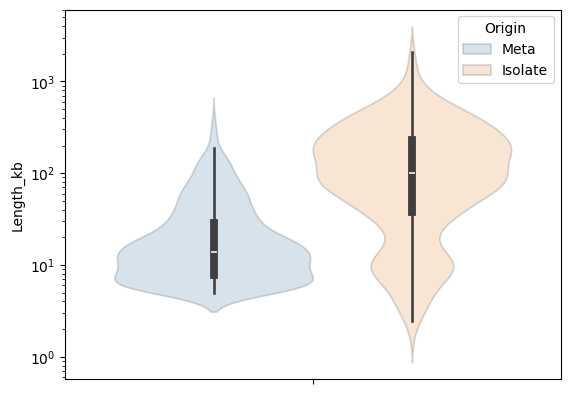

In [9]:
# sns.violinplot(
#     data=df[df["complete"]],
#     y="Length_kb",
#     hue="Origin",
#     log_scale=True,
#     alpha=0.2,
# )

<Axes: xlabel='Length_kb', ylabel='Density'>

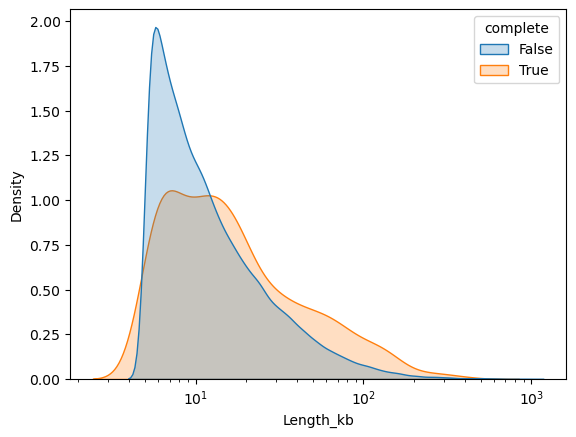

In [10]:
sns.kdeplot(
    data=df[df["Origin"] == "Meta"],
    x="Length_kb",
    fill=True,
    hue="complete",
    log_scale=True,
    common_norm=False,
)

In [11]:
from scipy.stats import mannwhitneyu

In [12]:
mannwhitneyu(
    df[df["Origin"] == "Isolate"]["Length_kb"].to_list(),
    df[(df["Origin"] == "Meta") & (df["complete"])]["Length_kb"].to_list(),
    alternative="greater",
)

MannwhitneyuResult(statistic=5249401.0, pvalue=8.548083244819264e-134)

In [13]:
mannwhitneyu(
    df[(df["Origin"] == "Meta") & (df["complete"])]["Length_kb"].to_list(),
    df[(df["Origin"] == "Meta") & (~df["complete"])]["Length_kb"].to_list(),
    alternative="greater",
)

MannwhitneyuResult(statistic=46442998.5, pvalue=4.4133210475519795e-26)

In [14]:
df[(df["Origin"] == "Meta") & (df["complete"])]["Length_kb"].median()

13.786

In [15]:
df[(df["Origin"] == "Isolate") & (df["complete"])]["Length_kb"].median()

99.3255

In [16]:
# ptus with isolates from refsoil and plsdb
ptus = pd.read_csv(
    "ptus_meta_with_isolate_plsdb_refsoil.tsv",
    sep="\t",
)

ptus.head()

,PTU,Representative,Members,Length,oids,Ecosystem Subtype Custom,Ecosystem Subtype,WWF_MHTNAM,Origin,Full_origin
0,PTU-00290,Refsoil_NC_010553.1,"Refsoil_NC_010553.1,3300025932|Ga0207690_10000...",71,"Refsoil_NC_010553.1,3300025932,3300005339,3300...",Unclassified;Rhizosphere;Rhizosphere;Rhizosphe...,Unclassified;Rhizosphere;Rhizosphere;Rhizosphe...,Unknown;Temperate Broadleaf and Mixed Forests;...,Both,Isolate;Meta;Meta;Meta;Isolate;Meta;Meta;Meta;...
1,PTU-00425,Refsoil_NC_008242.1,"Refsoil_NC_008242.1,3300049573|Ga0501037_00000...",51,"Refsoil_NC_008242.1,3300049573,3300036390,3300...",Unclassified;Rhizosphere;Other;Rhizosphere;Rhi...,Unclassified;Rhizosphere;Other;Rhizosphere;Rhi...,Unknown;Temperate Conifer Forests;Deserts and ...,Both,Isolate;Meta;Meta;Meta;Meta;Meta;Meta;Meta;Met...
2,PTU-00475,Refsoil_NC_019849.2,"Refsoil_NC_019849.2,IMGPR_plasmid_2523533632_0...",53,"Refsoil_NC_019849.2,2523533632,Refsoil_NC_0173...",Unclassified;Agricultural land;Unclassified;Un...,Unclassified;Agricultural land;Unclassified;Un...,"Unknown;Mediterranean Forests, Woodlands and S...",Both,Isolate;Isolate;Isolate;Isolate;Isolate;Isolat...
3,PTU-00505,Refsoil_NC_021908.1,"Refsoil_NC_021908.1,Refsoil_NZ_CP007069.1,Refs...",28,"Refsoil_NC_021908.1,Refsoil_NZ_CP007069.1,Refs...",Unclassified;Unclassified;Unclassified;Unclass...,Unclassified;Unclassified;Unclassified;Unclass...,Unknown;Unknown;Unknown;Unknown;Unknown;Unknow...,Both,Isolate;Isolate;Isolate;Isolate;Isolate;Isolat...
4,PTU-00627,Refsoil_NC_015062.1,"Refsoil_NC_015062.1,3300046810|Ga0495660_00000...",124,"Refsoil_NC_015062.1,3300046810,2561511173,Refs...",Unclassified;Rhizosphere;Agricultural land;Unc...,Unclassified;Rhizosphere;Agricultural land;Unc...,Unknown;Temperate Broadleaf and Mixed Forests;...,Both,Isolate;Meta;Isolate;Isolate;Meta;Isolate;Meta...


In [17]:
ptus_mapping = {}
for ptu in ptus.index:
    for plasmid in ptus.loc[ptu, "Members"].split(","):
        ptus_mapping[plasmid] = ptus.loc[ptu, "PTU"]

# ptus_mapping

In [18]:
df["ptu"] = df["Plasmid"].apply(lambda x: ptus_mapping.get(x))
# drop ptus with no refsoil or plsdb isolates
df = df.dropna(subset=["ptu"])
df.head()

,Plasmid,length,complete,Origin,Length_kb,ptu
134,2162886015|FOassembled-_contig00019,54542,False,Meta,54.542,PTU-00461
167,2166559006|FI_contig00380,6542,False,Meta,6.542,PTU-16841
243,3300000443|F12B_10029025,5544,False,Meta,5.544,PTU-01385
244,3300000443|F12B_10378992,5625,False,Meta,5.625,PTU-01391
245,3300000443|F12B_10137984,6416,False,Meta,6.416,PTU-02048


<Axes: ylabel='Frequency'>

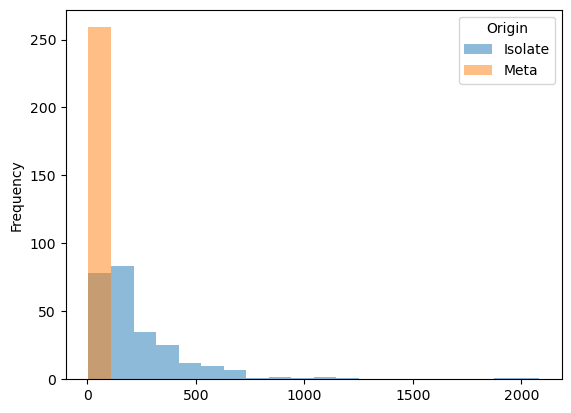

In [31]:
df.groupby(["ptu", "Origin"])["Length_kb"].mean().unstack().plot(
    kind="hist",
    bins=20,
    alpha=0.5,
)

In [34]:
df[(df["Length_kb"] > 200) & (df["Origin"] == "Meta")]

,Plasmid,length,complete,Origin,Length_kb,ptu
29597,3300036804|Ga0376679_0000013,261999,False,Meta,261.999,PTU-05774
47819,3300046458|Ga0495591_000017,238400,True,Meta,238.400,PTU-04722
48342,3300046471|Ga0495650_0000102,211007,False,Meta,211.007,PTU-00627
54947,3300046810|Ga0495660_0000006,571713,False,Meta,571.713,PTU-00627
78075,3300050133|Ga0500025_000003,558804,False,Meta,558.804,PTU-00627
